c:\Users\oleks\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


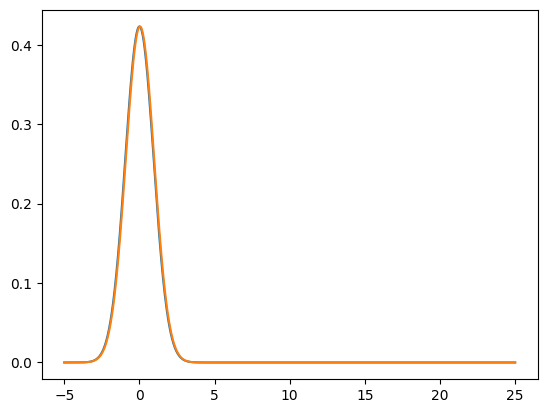

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg
import matplotlib.animation as animation
#parameters
k_0 = 10
delta_k = 0.75
t_max = 1
tau = 0.002
step_x = 1000
X = np.linspace(-5,25,step_x)
stepik = (np.abs(np.max(X)) + np.abs(np.min(X)))/step_x
time = int(t_max/tau)
#variable that turns on the potential - if equal to 1, V(x) is on, if not it's off
V_on = 1
#external potentail definition
def V(x):
    if V_on == 0:
        a = 0
        return a*x
    else:
        return 105*np.exp((-(x-10)**2)/(0.25))
#both initial wave functiona and |\Psi|^2
def initial_wave_fun(x):
    if x == np.min(X):
        psi = 0
    elif x == np.max(X):
        psi = 0
    else:
        psi = (np.sqrt(delta_k)/(np.pi/4))*np.exp(-x*x*delta_k*delta_k/2)*np.exp(1.j*k_0*x)
    return psi
def prob_initial(x):
    if x == np.min(X):
        psi = 0
    elif x == np.max(X):
        psi = 0
    else:
        psi = np.abs((np.sqrt(delta_k)/(np.pi**(1/4)))*np.exp(-x*x*delta_k*delta_k/2)*np.exp(1.j*k_0*x))**2
    return psi
#initializing A and R matrices used in solving the Schrödinger equation
def A_matrix(delta_t,delta_x,V_values):
    A = np.zeros((step_x ,step_x),dtype=complex)
    aj = cj = (-1.j*delta_t)/(2*delta_x*delta_x)
    for i in range(step_x):
        bj = 1 + ((1.j*delta_t)/(2))*(2/(delta_x*delta_x) + V_values[i])
        A[i,i] = bj
        if i != 0:
            A[i,i-1] = aj
        if i != step_x - 1:
            A[i,i+1] = cj
    return A

def r_matrix(wave_j,wave_j_plus,wave_j_minus,delta_t,delta_x,x):
    r = np.zeros(step_x,dtype=complex)
    return wave_j + (1.j*delta_t/2)*((wave_j_plus - 2*wave_j + wave_j_minus)/(delta_x*delta_x) - V(x)*wave_j)

R_init= np.zeros(step_x,dtype=complex)
w = 1
R_init[0] = 0
for i in range(1,len(X)-1):
    R_init[w] = r_matrix(initial_wave_fun(X[i]),initial_wave_fun(X[i+1]),initial_wave_fun(X[i-1]),tau,stepik,X[i])
    w += 1
R_init[-1] = 0
A = A_matrix(tau,stepik,V(X))
wave_fun = np.zeros(step_x,dtype=complex)
#method check
li = []
for i in X:
    li.append(prob_initial(i))
con = np.trapz(li,X)
con_2 = np.trapz((abs(scipy.sparse.linalg.spsolve(A, R_init)))**2,X)
plt.plot(X,(1/con)*np.array(li))
plt.plot(X,(1/con_2)*(abs(scipy.sparse.linalg.spsolve(A, R_init)))**2)
t = np.linspace(0,t_max,time)
w = 0
cos = np.zeros(time*len(X), dtype='complex')
l = 0
#finding wavefunction's forms in next time steps
for i in t:
    cos[l*len(X):l*len(X)+  len(X)] =  scipy.sparse.linalg.spsolve(A, R_init)
    
    w = 1
    R_init[0] = 0 
    for j in range(1,len(X)-1):
        cos[l*len(X):l*len(X)+  len(X)][0] = 0
        cos[l*len(X):l*len(X)+  len(X)][-1] = 0            
        R_init[w] = r_matrix(cos[l*len(X):l*len(X)+ len(X)][j],cos[l*len(X):l*len(X)+  len(X)][j+1],cos[l*len(X):l*len(X)+  len(X)][j-1],tau,stepik,X[j])
        w+=1
    R_init[-1] = 0
    l += 1


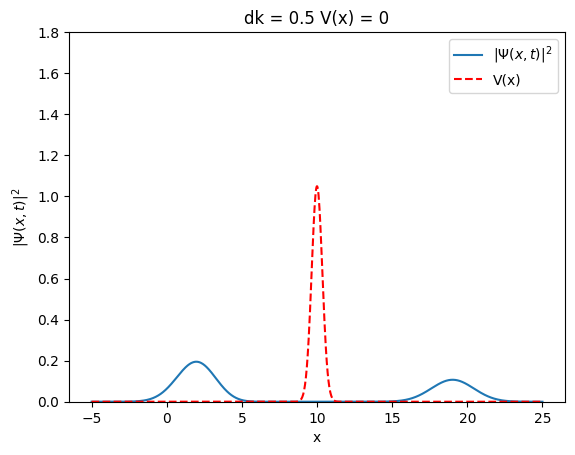

In [2]:
#visualisation and creation of gifs
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
def animation_psi(w):
    ax.clear()
    ax.set_ylim(0, 1.8)
    ax.set_xlabel('x')
    ax.set_ylabel(r'$|\Psi(x,t)|^{2}$')
    ax.set_title('dk = 0.5 V(x) = 0')
    s = 1/np.trapz(abs(cos[w*(len(X)):w*(len(X))+  len(X)])**2,X)
    ax.plot(X,s* abs(cos[w*(len(X)):w*(len(X))+  len(X)])**2)
    w +=1 
    ax.plot(X, 1/100 * V(X),'--',color= 'red')
    ax.legend([r'$|\Psi(x,t)|^{2}$','V(x)'])
animation = FuncAnimation(fig, animation_psi, frames=time, interval=1000)
animation.save('probability_dk_05.gif', writer='pillow', fps=60)
plt.show()

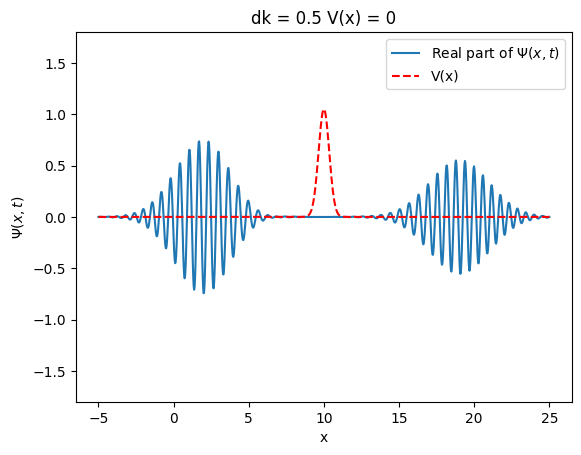

In [3]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
def animation_psi(w):
    ax.clear()
    ax.set_ylim(-1.8, 1.8)
    ax.set_xlabel('x')
    ax.set_ylabel(r'$\Psi(x,t)$')
    ax.set_title('dk = 0.5 V(x) = 0')
    #s = 1/np.trapz(abs(cos[w*(len(X)):w*(len(X))+  len(X)])**2,X)
    ax.plot(X,np.real(cos[w*(len(X)):w*(len(X))+  len(X)]))
    w +=1 
    ax.plot(X, 1/100 * V(X),'--',color= 'red')
    ax.legend([r'Real part of $\Psi(x,t)$','V(x)'])
animation = FuncAnimation(fig, animation_psi, frames=time, interval=100)
animation.save('real_dk_05_v_0_ok.gif', writer='pillow', fps=60)
plt.show()

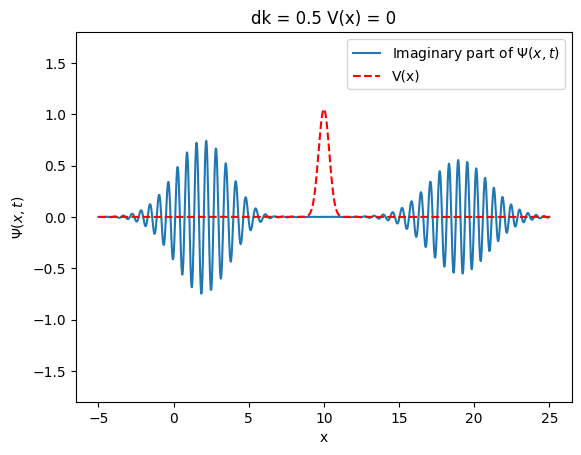

In [4]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
def animation_psi(w):
    ax.clear()
    ax.set_ylim(-1.8, 1.8)
    ax.set_xlabel('x')
    ax.set_ylabel(r'$\Psi(x,t)$')
    ax.set_title('dk = 0.5 V(x) = 0')
    #s = 1/np.trapz(abs(cos[w*(len(X)):w*(len(X))+  len(X)])**2,X)
    ax.plot(X,np.imag(cos[w*(len(X)):w*(len(X))+  len(X)]))
    w +=1 
    ax.plot(X, 1/100 * V(X),'--',color= 'red')
    ax.legend([r'Imaginary part of $\Psi(x,t)$','V(x)'])
animation = FuncAnimation(fig, animation_psi, frames=time, interval=100)
animation.save('imaginary_dk_05_v_0_ok.gif', writer='pillow', fps=60)
plt.show()